# Lab 3 - Andre Piccolo - 300347025

## Import library

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

## Read Data

In [13]:
df = pd.read_csv('Employee-Attrition.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

## Prepare Dataset

In [15]:
def changeCharacter(x, original, replace):
    return x.replace(original,replace) if x.dtype == "object" else x

# Remove white spaces and replace for "_"
df = df.apply(lambda x: changeCharacter(x, " ", "_"))

# Create dummies for object categories
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [16]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [17]:
target=df['Attrition_Yes']
features=df.drop(['Attrition_Yes'], axis=1)
features.shape

(1470, 43)

## Using Variance Threshold

In [18]:
vt = VarianceThreshold(threshold=.2)
vt.fit(features)
fs = features.iloc[:,vt.get_support()]
print(fs.shape)
fs.head()

(1470, 30)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsWithCurrManager,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,5,1,0,1,1,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,7,0,1,0,1,0,1,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,1,1,0,0,0,1,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,1,1,0,0,1,1,1,0,0


## Feature Scaling - MinMax Scaler

In [19]:
def scaling(dataframe):
    ms = MinMaxScaler()
    scaled = ms.fit_transform(dataframe)
    return pd.DataFrame(scaled, columns=dataframe.columns)

df_scal = scaling(fs)
df_scal.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsWithCurrManager,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.294118,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.411765,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.117647,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


## Grid Search with cross validation - GridSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_scal, target, test_size=0.25, random_state=1)

grid_parameters = {'kernel': ['linear', 'poly'],'gamma': [1, 0.1, 0.01, 0.001],
                   'C': [1, 10, 50],'degree':[3,4]}

clf = GridSearchCV(SVC(random_state=42),grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best model score:", clf.best_score_)

# Save the best model
best_model=clf.best_estimator_

Best parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
Best model score: 0.8784162895927603


## Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

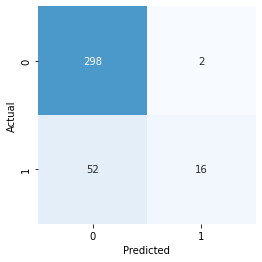

In [21]:
y_pred=best_model.predict(X_test)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True,cbar=False,
          vmax=500, square=True, fmt="d", cmap="Blues")

In base of Confusion Matrix we can infer that:

* Precision for positive cases = TP/(TP+FP) = 16/(16+2) = 0.88
* Recall for positive cases = TP/(TP+FN) = 16/(16+52) = 0.23

* Precision for negative cases = TN/(TN+FN) = 298/(298+52) = 0.85
* Recall for negative cases = TN/(TN+FP) = 298/(298+2) = 0.99

* Accuracy = (TP+TN)/total = (16+298)/368 = 0.85

## Classification Report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       300
           1       0.89      0.24      0.37        68

    accuracy                           0.85       368
   macro avg       0.87      0.61      0.64       368
weighted avg       0.86      0.85      0.82       368



* Precision for negative values is 85%. This means that model predicts negative values correctly 85%.
* Precision for positive values is 89%. This means that model predicts positive values correctly 89%.
* Recall for negative value is 99%. This means that classifier can find 99% of negative values in our model.
* Recall for positive value is 24%. This means that classifier can find 24% of positive values in our model.